In [126]:
import numpy as np
import matplotlib.pyplot as plt

### Perceptron discreto

In [127]:
class PerceptronSimple:
    def __init__(self, input_size, output_size, lr=0.01, epochs=10000):
        self.w = np.random.randn(output_size, input_size) * 0.01
        self.b = np.random.randn(output_size)
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, x_i):
        return self.activation(np.dot(self.w, x_i) + self.b)

    def train(self, X, d, tol=1e-4):
        for epoch in range(self.epochs):
            total_error = 0
            for x_i, d_i in zip(X, d):
                d_pred = self.predict(x_i)
                error = d_i - d_pred
                self.w += self.lr * np.outer(error, x_i)
                self.b += self.lr * error
                total_error += np.sum(np.abs(error))
            if total_error < tol:
                break  # Detener si el error es mínimo

In [128]:
X = np.array([(0,0), (0,1), (1, 0), (1, 1)])
d = np.array([0, 0, 0, 1])

n = X.shape[1]

p = PerceptronSimple(n, 1)

p.train(X, d) 

p.predict((1,1))

array([1])

### Perceptron Grilla

In [129]:
def flatten(matrix):
    return np.array(matrix).flatten()

In [ ]:
letras = {
    'A': flatten([
        [0,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,1],
        [1,0,0,0,1],
        [1,0,0,0,1]
    ]),
    'B': flatten([
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0]
    ]),
    'C': flatten([
        [0,1,1,1,1],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [0,1,1,1,1]
    ]),
}

In [131]:
def letra_a_codigo(letra):
    index = ord(letra.upper()) - ord('A')
    return np.array([int(x) for x in format(index, '05b')])

print(letra_a_codigo('A')) # 0 0 0 0 0 = Letra 0
print(letra_a_codigo('B')) # 0 0 0 0 1 = Letra 1
print(letra_a_codigo('Z')) # 1 1 0 0 1 = Letra 25

[0 0 0 0 0]
[0 0 0 0 1]
[1 1 0 0 1]


In [132]:
X = []
d = []

for letra, grilla in letras.items():
    X.append(grilla)                    # Los features son la grilla de la letra
    d.append(letra_a_codigo(letra))     # Lo esperado es la letra en binario

X = np.array(X)
d = np.array(d)

n = X.shape[1]  # Cantidad de features por input
m = d.shape[1]  # Cantidad de numeros binarios en el output

p = PerceptronSimple(n, m)

p.train(X, d)

print(p.predict(letras['A']))
print(p.predict(letras['B']))
print(p.predict(letras['C']))
print(p.predict(flatten([ # R -> Deberia parecerse a B (0 0 0 0 1)
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0],
        [1,0,0,1,0],
        [1,0,0,0,1]
    ])))
print(p.predict(flatten([ # G -> Deberia parecerse a C (0 0 0 1 0)
        [0,1,1,1,1],
        [1,0,0,0,0],
        [1,0,0,1,1],
        [1,0,0,0,1],
        [0,1,1,1,1]
    ])))

[0 0 0 0 0]
[0 0 0 0 1]
[0 0 0 1 0]
[0 0 1 0 1]
[0 0 0 1 0]


In [133]:
# Ruido en patrones de entrada
def add_salt_pepper_flattened(flattened_image, noise_prob=0.05):
    noisy = flattened_image.copy()
    total_pixels = len(noisy)
    
    salt_mask = np.random.rand(total_pixels) < (noise_prob / 2)  # 50% of noise -> salt
    pepper_mask = np.random.rand(total_pixels) < (noise_prob / 2)  # 50% -> pepper

    # Apply noise
    noisy[salt_mask] = 1.0  
    noisy[pepper_mask] = 0.0  
    
    return noisy

A_noise = add_salt_pepper_flattened(letras['A'])
print(p.predict(A_noise))

[0 0 0 0 0]


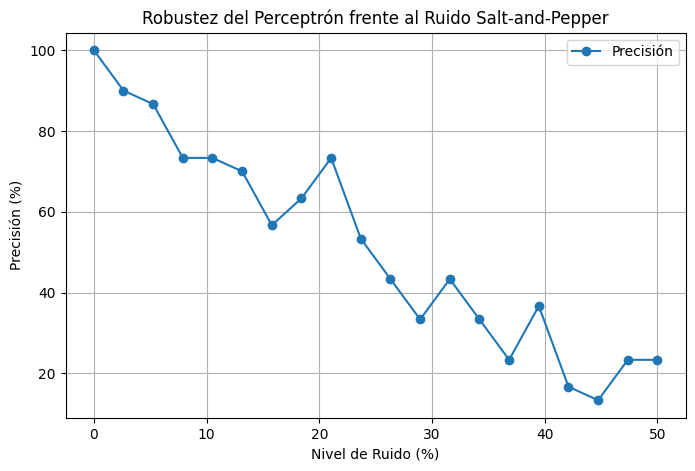

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrenamiento (letras originales)
X_train = []
d_train = []
for letra, grilla in letras.items():
    X_train.append(grilla)
    d_train.append(letra_a_codigo(letra))

X_train = np.array(X_train)
d_train = np.array(d_train)

n = X_train.shape[1]  # Número de features (25 para una matriz 5x5)
m = d_train.shape[1]  # Número de bits de salida (5)

# Probamos distintos niveles de ruido (0% a 50%)
noise_levels = np.linspace(0, 0.5, 20)  # 20 puntos entre 0% y 50%
accuracies = []

# Promediamos sobre 5 ejecuciones para reducir variabilidad
for noise_prob in noise_levels:
    epoch_accuracies = []
    
    for _ in range(5):  # Repetimos 5 veces para cada nivel de ruido
        # Entrenamos el perceptrón con datos limpios
        p = PerceptronSimple(n, m, lr=0.01, epochs=1000)
        p.train(X_train, d_train)
        
        # Testeamos con datos ruidosos
        correct = 0
        for letra, grilla in letras.items():
            grilla_noisy = add_salt_pepper_flattened(grilla, noise_prob)
            pred = p.predict(grilla_noisy)
            if np.array_equal(pred, letra_a_codigo(letra)):
                correct += 1
        
        epoch_accuracies.append(correct / len(letras))
    
    accuracies.append(np.mean(epoch_accuracies))  # Promedio de precisión

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(noise_levels * 100, np.array(accuracies) * 100, 'o-', label='Precisión')
plt.xlabel('Nivel de Ruido (%)')
plt.ylabel('Precisión (%)')
plt.title('Robustez del Perceptrón frente al Ruido Salt-and-Pepper')
plt.grid(True)
plt.legend()
plt.show()